Tyler Beaulieu  
DS5010, Fall 2024   
December 5, 2024  

<h4 style="text-align:center;">Final Project: Exoplanets</h4>

Design 25 exciting questions based on your dataset, adhering to the following format:
- At least five questions should be solved using functions you define (such as lambda-map functions).
- For at least ten questions, you should utilize Pandas and NumPy.
- For at least five questions, you should create visualizations using Matplotlib and Seaborn.
- Design at least five questions that reveal valuable and exciting insights from your dataset using any techniques you like.



***

In [1]:
#Get everything imported.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the planetary systems database.
nasa = pd.read_csv("exoplanets.csv")

#Import the consolidated planetary systems database.
nasacon = pd.read_csv("exoplanets_consolidated.csv")

nasacon

C:\Users\tyler\AppData\Local\Temp\ipykernel_42188\829276796.py:8: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  nasa = pd.read_csv("exoplanets.csv")


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,2,0,0,0,0
1,2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0,0
2,3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0,0
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0,0
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783,5784,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0,0
5784,5785,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0,0
5785,5786,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0,0
5786,5787,ups Leo b,ups Leo,b,NaN,NaN,TIC 49430557,Gaia DR2 3794167001116433152,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0,0


***
Count the 15 telescopes that have positively identified the most exoplanets.

In [2]:
nasa.groupby('disc_telescope')['rowid'].count().sort_values(ascending=False).head(15)

disc_telescope
0.95 m Kepler Telescope                28757
Canon 200mm f/1.8L                      1749
0.1 m TESS Telescope                    1469
Multiple Telescopes                      680
10 m Keck I Telescope                    626
3.6 m ESO Telescope                      415
1.3 m Warsaw University Telescope        352
0.18 m Takahashi Epsilon Astrograph      294
1.6 m wide-field telescope               270
1.93 m Telescope                         162
1.2 m Leonhard Euler Telescope           156
3.0 m C. Donald Shane Telescope          132
0.27 m CoRoT Telescope                   130
3.9 m Anglo-Australian Telescope         122
Mamiya 645 80mm f/1.9                    119
Name: rowid, dtype: int64

***
Which facilities are using a Canon telephoto lens as a telescope?

In [3]:
#Queried 'disc_faciility' to find out which facilities are using a Canon telephoto lens to find exoplanets?
nasa.loc[nasa['disc_telescope'] == 'Canon 200mm f/1.8L'].groupby('disc_facility')['rowid'].count()

disc_facility
HATNet             512
SuperWASP          955
SuperWASP-North     21
SuperWASP-South    155
WASP-South          39
XO                  67
Name: rowid, dtype: int64

***
Summarize the types of planets being found by these facilities.

In [4]:
#Looking at planetary radius, orbital period, and mass for planets found by HATnet and SuperWASP
nasa.loc[nasa['disc_telescope'] == 'Canon 200mm f/1.8L'][['pl_rade','pl_orbper','pl_masse']].describe()

,pl_rade,pl_orbper,pl_masse
count,939.000000,1664.000000,732.000000
mean,14.200954,6.174088,520.188270
std,3.298658,105.902701,681.217905
min,4.360000,0.788839,18.751000
25%,12.292500,2.514887,181.077567
50%,13.840000,3.366830,291.883970
75%,15.693000,4.317686,562.320727
max,40.000000,4323.000000,4211.226390


In [5]:
#Looking at planetary radius, orbital period, and mass for planets not found by HATnet and SuperWASP
nasa.loc[nasa['disc_telescope'] != 'Canon 200mm f/1.8L'][['pl_rade','pl_orbper','pl_masse']].describe()

,pl_rade,pl_orbper,pl_masse
count,23891.000000,3.160200e+04,3263.000000
mean,4.935119,1.381522e+04,780.618961
std,70.716148,2.262668e+06,1727.318390
min,0.270000,9.070629e-02,0.020000
25%,1.530000,4.820511e+00,9.400000
50%,2.230000,1.129695e+01,92.170000
75%,3.070000,2.868513e+01,637.500000
max,4282.980000,4.020000e+08,25426.400000


***
Create a dataframe with only planets found by the top 3 telescopes, Kepler, TESS, and HATNet/SuperWASP. 

In [6]:
top3 = nasa.loc[(nasa['disc_telescope'] == 'Canon 200mm f/1.8L') | (nasa['disc_telescope'] == '0.95 m Kepler Telescope') | (nasa['disc_telescope'] == '0.1 m TESS Telescope')]
top3

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
47,48,2MASS J19383260+4603591 b,2MASS J19383260+4603591,b,NaN,NaN,TIC 271164763,Gaia DR2 2080063931448749824,1,2,...,2022-04-19,2022-04,2022-04-19,1,0,0,0,0,0,0
48,49,2MASS J19383260+4603591 b,2MASS J19383260+4603591,b,NaN,NaN,TIC 271164763,Gaia DR2 2080063931448749824,0,2,...,2015-06-04,2015-05,2015-06-04,1,0,0,0,0,0,0
165,166,AU Mic b,AU Mic,b,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,0,1,...,2022-05-09,2022-04,2022-05-09,1,1,0,1,0,0,0
166,167,AU Mic b,AU Mic,b,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,0,1,...,2023-05-03,2020-08,2023-05-03,1,1,0,1,0,0,0
167,168,AU Mic b,AU Mic,b,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,0,1,...,2022-08-10,2017-07,2022-08-10,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36374,36375,pi Men c,HD 39091,c,HD 39091,HIP 26394,TIC 261136679,Gaia DR2 4623036865373793408,1,1,...,2023-06-14,2022-09,2023-06-14,2,1,2,1,0,0,0
36375,36376,pi Men c,HD 39091,c,HD 39091,HIP 26394,TIC 261136679,Gaia DR2 4623036865373793408,0,1,...,2024-03-04,2023-03,2024-03-04,2,1,2,1,0,0,0
36376,36377,pi Men c,HD 39091,c,HD 39091,HIP 26394,TIC 261136679,Gaia DR2 4623036865373793408,0,1,...,2018-11-26,2018-11,2018-11-29,2,1,2,1,0,0,0
36377,36378,pi Men c,HD 39091,c,HD 39091,HIP 26394,TIC 261136679,Gaia DR2 4623036865373793408,0,1,...,2023-04-10,2017-07,2023-04-10,2,1,2,1,0,0,0


***
Look at planets discovered by the top 3 telescopes, in terms of size and orbital period.

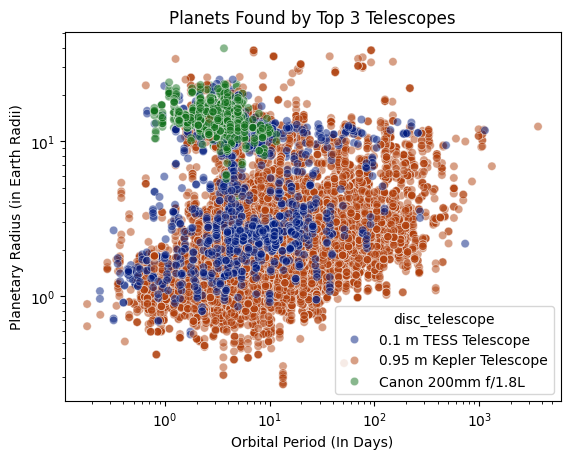

In [7]:
sns.scatterplot(data=top3.loc[nasa['pl_rade'] < 40], x='pl_orbper', y='pl_rade', hue='disc_telescope', palette='dark', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (In Days)')
plt.ylabel('Planetary Radius (in Earth Radii)')
plt.title('Planets Found by Top 3 Telescopes');

***
Make a jointplot of this data, removing the log scale and zooming in on the bulk of the data.

Text(37.722222222222214, 0.5, 'Planetary Radius (in Earth Radii)')

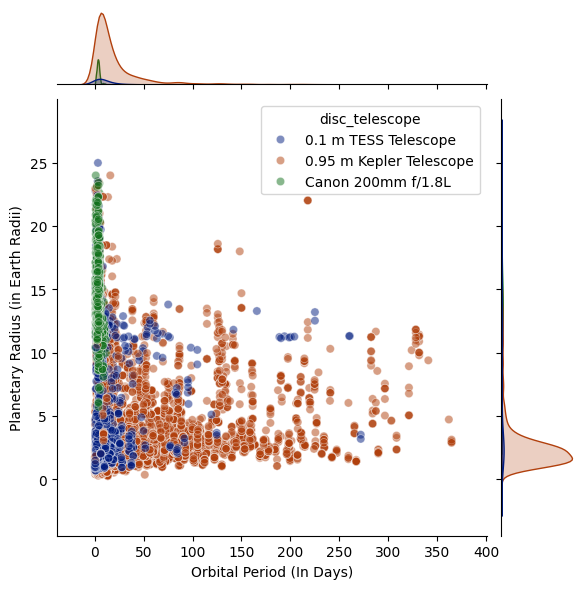

In [8]:
sns.jointplot(data=top3.loc[(nasa['pl_rade'] < 25) & (nasa['pl_orbper'] < 365)], x='pl_orbper', y='pl_rade', hue='disc_telescope', alpha=0.5, palette='dark')
plt.xlabel('Orbital Period (In Days)')
plt.ylabel('Planetary Radius (in Earth Radii)')

***
What are the 10 most commmon discovery methods?

In [9]:
nasa.groupby('discoverymethod')['rowid'].count().sort_values(ascending=False).head(10)


discoverymethod
Transit                          32838
Radial Velocity                   2564
Microlensing                       671
Imaging                            147
Transit Timing Variations          140
Eclipse Timing Variations           24
Orbital Brightness Modulation       21
Pulsar Timing                       13
Astrometry                           3
Pulsation Timing Variations          2
Name: rowid, dtype: int64

***
Create a new column for decade that a planet was discovered.

In [10]:
nasa['decade'] = nasa['disc_year'].map(lambda d: str(d)[0:3]+'0s')
nasa.groupby('decade')['rowid'].count()

decade
1990s      177
2000s     1917
2010s    28640
2020s     5690
Name: rowid, dtype: int64

***
Create a dataframe with only planets found by the top 4 discovery methods, Transit, Radial Velocity, Microlensing, and Imaging.

In [21]:
top_method = nasa.loc[nasa['discoverymethod'].isin(['Transit','Radial Velocity','Microlensing','Imaging'])]

***
Create violin plots for the top four discovery methods, showing the distribution of exoplanets distance from Earth.

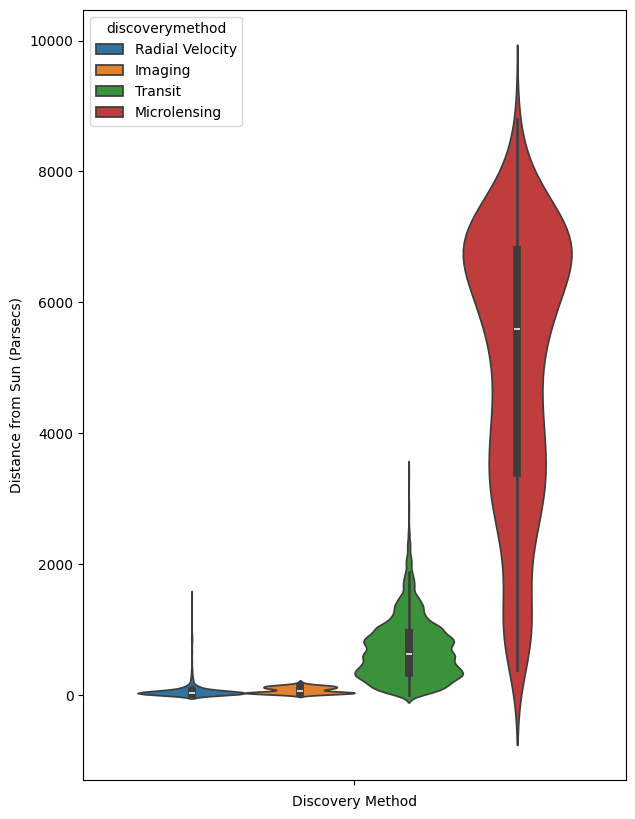

In [22]:
plt.figure(figsize=(7,10))
sns.violinplot(data=top_method,y='sy_dist',hue='discoverymethod')
plt.ylabel('Distance from Sun (Parsecs)')
plt.xlabel('Discovery Method');

***
Create boxplots for each decade exoplanets were discovered showing the distributions of distances from Earth for those exoplanets. Put the hue as discovery method, but exclude microlensing.

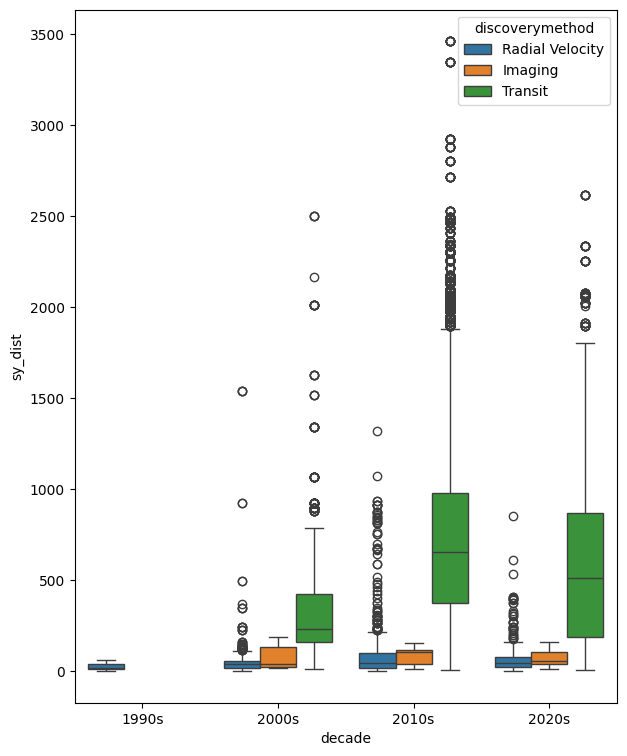

In [23]:
top_method = top_method.sort_values('decade')
plt.figure(figsize=(7,9))
sns.boxplot(data=top_method.loc[nasa['discoverymethod'] != 'Microlensing'],y='sy_dist',x='decade',hue='discoverymethod');


***
Create subplots showing the distribution of planets in different decades.

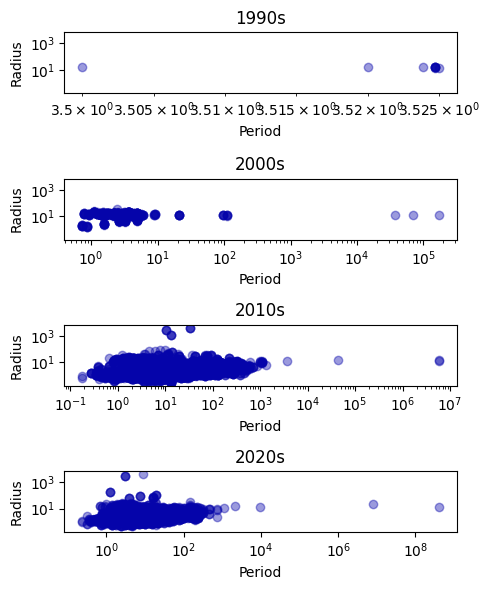

In [34]:
decades = top_method['decade'].unique()
fig, axs = plt.subplots(nrows=len(decades),ncols=1,figsize=(5,6),sharey=True)

for i in range(len(decades)):
    exo_bool = top_method['decade'] == decades[i]
    radius = top_method[exo_bool == True]['pl_rade']
    period = top_method[exo_bool == True]['pl_orbper']
    axs[i].scatter(x=period,y=radius,color='xkcd:royal blue',alpha=0.4)
    axs[i].set_title(decades[i])
    axs[i].set_xlabel("Period")
    axs[i].set_ylabel("Radius")
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")

plt.tight_layout();

***
Create strip plots to show the distribution of stars discovered by distance from Earth, by year.

<Axes: xlabel='disc_year', ylabel='sy_dist'>

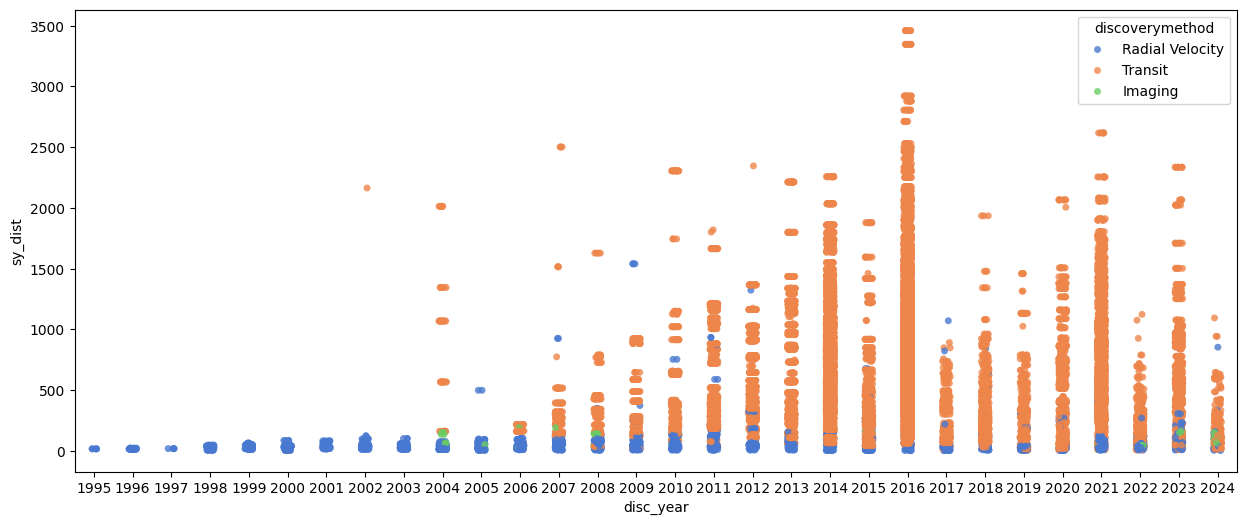

In [14]:
plt.figure(figsize=(15,6))
sns.stripplot(data=top_method.loc[nasa['discoverymethod'] != 'Microlensing'],y='sy_dist',x='disc_year',hue='discoverymethod',alpha=0.8,palette='muted', jitter = True)

***
How many planets have been discovered that are less than two Earth radii in radius?

In [15]:
earth_adjace = nasacon.loc[nasacon['pl_rade'] < 3]
earth_adjace

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
35,36,55 Cnc e,55 Cnc,e,HD 75732,HIP 43587,TIC 332064670,Gaia DR2 704967037090946688,2,5,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,6.0,1,9,11,19,4,0
38,39,61 Vir b,61 Vir,b,HD 115617,HIP 64924,TIC 422478973,Gaia DR2 3507879565090229888,1,3,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,1,6,9,0,0,0
53,54,AU Mic c,AU Mic,c,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,3,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,0,1,0,0,0
54,55,AU Mic d,AU Mic,d,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,3,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,0,1,0,0,0
62,63,BD+20 594 b,BD+20 594,b,NaN,NaN,TIC 26123781,Gaia DR2 58200934326315136,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,5777,rho CrB e,rho CrB,e,HD 143761,HIP 78459,TIC 458494003,Gaia DR2 1323427759184545536,1,4,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,1,2,0,0,0
5778,5779,tau Cet e,tau Cet,e,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,1,4,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,4,10,0,0,0
5779,5780,tau Cet f,tau Cet,f,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,1,4,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,4,10,0,0,0
5780,5781,tau Cet g,tau Cet,g,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,1,4,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,4,10,0,0,0


***
Create a scatter plot and rug plot show planetary radius and math for planets that are less than three Earth radii.

C:\Users\tyler\AppData\Local\Temp\ipykernel_42188\4085536645.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=earth_adjace, x="pl_bmasse", y="pl_rade", palette='dark', alpha=0.6)
C:\Users\tyler\AppData\Local\Temp\ipykernel_42188\4085536645.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.rugplot(data=earth_adjace, x="pl_bmasse", y="pl_rade", palette='dark', alpha=0.6)


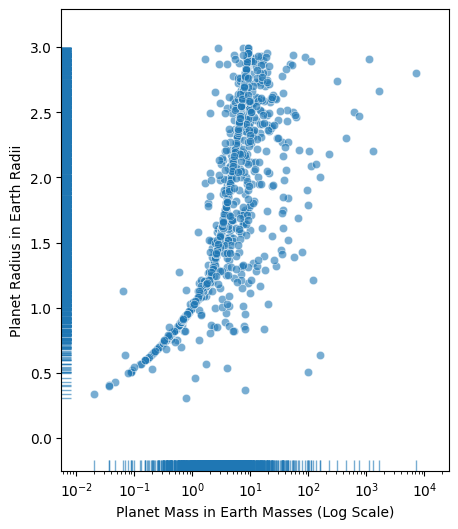

In [16]:
plt.figure(figsize=(5,6))
sns.scatterplot(data=earth_adjace, x="pl_bmasse", y="pl_rade", palette='dark', alpha=0.6)
sns.rugplot(data=earth_adjace, x="pl_bmasse", y="pl_rade", palette='dark', alpha=0.6)
plt.xscale('log')
plt.xlabel('Planet Mass in Earth Masses (Log Scale)')
plt.ylabel('Planet Radius in Earth Radii');

***
Import the TESS candidates table and narrow it down to rows that have data about orbital period and planetary radius.

In [17]:
#Import the TESS candidates database.
tess = pd.read_csv("tess.csv")
tess

,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,raerr1,...,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,NaN,...,-0.07,0,1,2.169860,0.072573,-0.072573,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,NaN,...,-0.09,0,1,2.010000,0.090000,-0.090000,0,1,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,NaN,...,NaN,0,1,5.730000,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,NaN,...,-1.64,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,NaN,...,-0.07,0,1,2.150000,0.060000,-0.060000,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,7347,995.01,995,317951248,3.179512e+08,1,FP,07h23m14.75s,110.811443,NaN,...,NaN,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
7347,7348,996.01,996,142918609,1.429186e+08,1,FP,07h57m23.99s,119.349948,NaN,...,NaN,0,1,2.050000,NaN,NaN,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
7348,7349,997.01,997,341729521,3.417295e+08,1,FP,08h05m16.69s,121.319521,NaN,...,-0.08,0,1,0.926261,0.045789,-0.045789,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
7349,7350,998.01,998,54390047,5.439005e+07,1,FP,07h53m16.69s,118.319555,NaN,...,-0.07,0,1,2.349860,0.091578,-0.091578,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01


In [18]:
tess = tess.dropna(subset=['pl_rade','pl_orbper'])
tess

,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,raerr1,...,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,NaN,...,-0.07,0,1,2.169860,0.072573,-0.072573,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,NaN,...,-0.09,0,1,2.010000,0.090000,-0.090000,0,1,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,NaN,...,NaN,0,1,5.730000,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,NaN,...,-0.07,0,1,2.150000,0.060000,-0.060000,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
5,6,1005.01,1005,169904935,1.699049e+08,1,FP,08h02m49.15s,120.704811,NaN,...,NaN,0,1,1.090000,0.070000,-0.070000,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7345,7346,994.01,994,93963408,9.396341e+07,1,FP,07h40m11.12s,115.046333,NaN,...,-0.07,0,1,1.877390,0.078985,-0.078985,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
7347,7348,996.01,996,142918609,1.429186e+08,1,FP,07h57m23.99s,119.349948,NaN,...,NaN,0,1,2.050000,NaN,NaN,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
7348,7349,997.01,997,341729521,3.417295e+08,1,FP,08h05m16.69s,121.319521,NaN,...,-0.08,0,1,0.926261,0.045789,-0.045789,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
7349,7350,998.01,998,54390047,5.439005e+07,1,FP,07h53m16.69s,118.319555,NaN,...,-0.07,0,1,2.349860,0.091578,-0.091578,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01


***
Create a graph of Tess candidates overlayed over a graph of all other exoplanets.

C:\Users\tyler\AppData\Local\Temp\ipykernel_42188\150897689.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right");


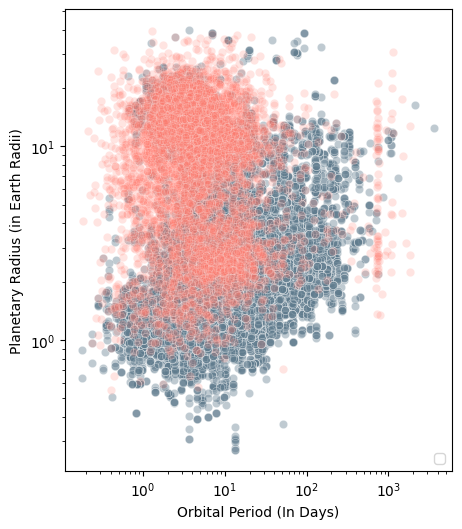

In [ ]:
plt.figure(figsize=(5,6))
sns.scatterplot(data=nasa.loc[(nasa['pl_rade'] < 40) & (nasa['pl_orbper'] < 5000)], x='pl_orbper', y='pl_rade', c='xkcd:blue grey', alpha=.4)
sns.scatterplot(data=tess.loc[tess['pl_rade'] < 40], x='pl_orbper', y='pl_rade', c='xkcd:salmon', alpha=.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (In Days)')
plt.ylabel('Planetary Radius (in Earth Radii)');

***
What stellar spectral types have exoplanets been found around?

In [20]:
nasa_spec=nasa.dropna(subset='st_spectype')
nasa_spec['st_spectrum']=nasa_spec['st_spectype'].map(lambda d: str(d)[0:1])
nasa_spec2 = nasa_spec.loc[nasa_spec['st_spectrum'].isin(['O','B','A','F','G','K','M'])]
spectrum = nasa_spec2.groupby('st_spectrum')['rowid'].count().reset_index

C:\Users\tyler\AppData\Local\Temp\ipykernel_42188\3465025280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasa_spec['st_spectrum']=nasa_spec['st_spectype'].map(lambda d: str(d)[0:1])
